# **Mathematical Tools for Big Data - Assignment 3**

### **Students :**
- **Alexandra de Carvalho** (93346)
- **Diogo Pedrosa** (xxxxx)
- **Roshan Poudel** (109806)

## **Common Steps**

## Reading and General data analysis

In [1]:
import pandas as pd
import numpy as np
import random

random.seed(2022)
# reading data
data = pd.read_csv("data/cash-crops-nepal.csv")
# visualize some data
data.iloc[:5,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641


In [2]:
data.shape

(105, 6)

In [3]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


In [4]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:5,:]

,Area,Production,Yield
91,15000,19000,1267
10,184460,116300,630
86,19840,23452,1182
16,188455,132331,702
60,3597,3460,962


In [5]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:5,:]

,Area,Production,Yield
91,0.078770,0.007996,0.031504
10,0.968655,0.048946,0.015665
86,0.104186,0.009870,0.029391
16,0.989634,0.055692,0.017455
60,0.018889,0.001456,0.023920


## Loading SOM utils

In [6]:
from scripts.som_utils import neighborhood_preservation_trustworthiness
from scripts.som_utils import som_train_predict
from scripts.som_utils import visualize_som

from scripts.som_utils import quantization_error_test

## Base SOM (SOM1)

[3 3]
SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
n

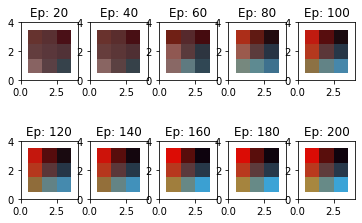

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
91,1991/92,2048/49,JUTE,15000,19000,1267,0.078770,0.007996,0.031504,"[[0.05963742961284422, 0.013766804937795196, 0...","[2, 2]"
10,1994/95,2051/52,OILSEED,184460,116300,630,0.968655,0.048946,0.015665,"[[0.8599961297582928, 0.04826974518533815, 0.0...","[0, 2]"
86,1986/87,2043/44,JUTE,19840,23452,1182,0.104186,0.009870,0.029391,"[[0.05963742961284422, 0.013766804937795196, 0...","[2, 2]"
16,2000/2001,2057/58,OILSEED,188455,132331,702,0.989634,0.055692,0.017455,"[[0.8599961297582928, 0.04826974518533815, 0.0...","[0, 2]"
60,2002/2003,2059/60,TOBACCO,3597,3460,962,0.018889,0.001456,0.023920,"[[0.05963742961284422, 0.013766804937795196, 0...","[2, 2]"


In [7]:
from scripts.our_som1 import SOM as SOM_1_base
# som = SOM(x_size, y_size, num_features)
som_1 = SOM_1_base(3,3,3)
joined_df, clustered_df = som_train_predict(som_1, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
joined_df.iloc[0:5]

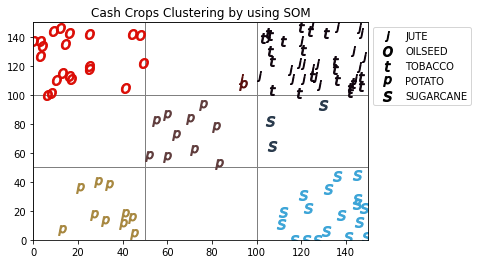

In [8]:
visualize_som(som_1, joined_df)

In [9]:
trunc_data.head()

,Area,Production,Yield
91,0.078770,0.007996,0.031504
10,0.968655,0.048946,0.015665
86,0.104186,0.009870,0.029391
16,0.989634,0.055692,0.017455
60,0.018889,0.001456,0.023920


In [10]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd.head()

,0,1,2
91,0.059637,0.013767,0.050067
10,0.859996,0.048270,0.019452
86,0.059637,0.013767,0.050067
16,0.859996,0.048270,0.019452
60,0.059637,0.013767,0.050067


<br /> <br />
## **Q1:** What is the numeric criteria that you may use to determine if a change in the algorithm produces improvements?

Throughout this assignment, we will be exploring different changes to the proposed algorithm, and their impact in results. Thus, we are in need of a numerical criteria that will allow us to measure results. For this reason, we are going to use the metrics of neighbourhood preservation and trustworthiness. These measure how the projection preserves the neighborhoods present in the input space by ranking the k-nearest neighbors of each sample before and after projection. The implementation of this criteria is in function `neighborhood_preservation_trustworthiness` inside `soms/som_utils.py` file.

In [11]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9672676837725381, 0.8807023650884303)

In [12]:
quantization_error_test(trunc_data, cd)

0.14603517164614624

<br /> <br />
## **Q2:** Write the version SOM1A, where you change the curve of the learning factor. Did you achieve improvements?

The learning rate controls the size of weight vector. Therefore, chosing its decay function is important. There are many learning rate functions, like the power series implemented in `scripts/our_som1.py`. We found that a linear learning rate, implemented in `scripts/our_som1_A.py`, improves the algorithm performance, as shown by comparing the measurement function results.

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.0005
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.00025
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.00016666666666666666
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.000125
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.0001
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  8.333333333333333e-05
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  7.142857142857143e-05
-------------------------------------
SOM training epoches 160
neighborhood radius  1.2457309396155174
learning rate  6

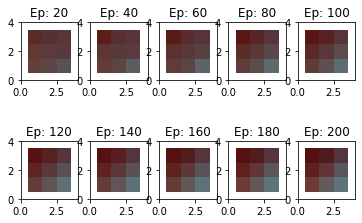

In [13]:
from scripts.our_som1_A import SOM as SOM_1_A
# som = SOM(x_size, y_size, num_features)
som_1_A = SOM_1_A(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_A, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
#joined_df.iloc[0:5]

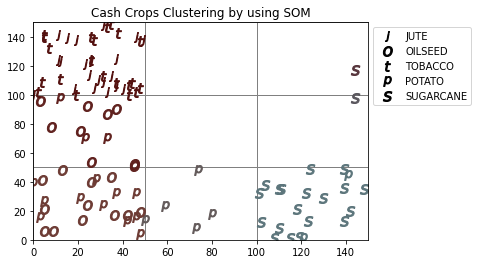

In [14]:
visualize_som(som_1_A, joined_df)

In [15]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

In [16]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.8862690707350902, 0.7988885812098241)

In [17]:
quantization_error_test(trunc_data, cd)

0.5116660874246368

<br /> <br />
## **Q3:** Write the version SOM1B, where you change the curve of the deviation. Did you achieve improvements?

SOM training epoches 20
neighborhood radius  0.4060058497098381
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  0.054946916666202536
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  0.0074362565299990755
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  0.0010063878837075356
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  0.00013619978928745456
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.843263705998463e-05
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 140
neighborhood radius  2.494586157310704e-06
learning rate  0.004965853037914096
-------------------------------------
SOM training 

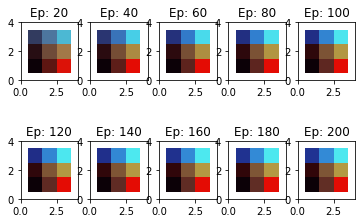

In [18]:
from scripts.our_som1_B import SOM as SOM_1_B
# som = SOM(x_size, y_size, num_features)
som_1_B = SOM_1_B(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_B, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
#joined_df.iloc[0:5]

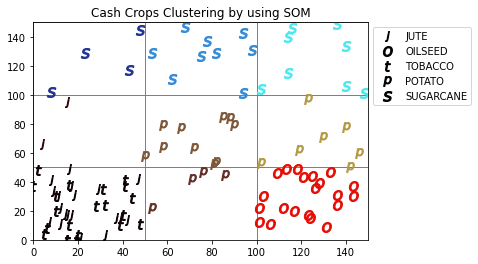

In [19]:
visualize_som(som_1_B, joined_df)

In [20]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.993712436430883, 0.8924356490583952)

In [21]:
quantization_error_test(trunc_data, cd)

0.08182226492992364

<br /> <br />
## **Q4:** Write the version SOM1C, where you change the normal distribution to other distribution of your choice. Did you achieve improvements?

# **STILL NEED TO CHANGE THE THING**

In [ ]:
from scripts.our_som1_C import SOM as SOM_1_C
# som = SOM(x_size, y_size, num_features)
som_1_C = SOM_1_C(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_A, trunc_data, agri_data, num_epochs=200, init_learning_rate=0.01)
#joined_df.iloc[0:5]

In [ ]:
visualize_som(som_1_C, joined_df)

In [ ]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

neighborhood_preservation_trustworthiness(1, trunc_data, cd)

<br /> <br />
## **Q5\* :** Determine the mathematical conditions that ensure the convergence of equation (3) in page 14 of this slides.

<br /> <br />
## **Q6 :** As explained in class, SOM can be seen as a Euler integration method for the corresponding ODE. Estimate the absolute error after N epochs.

<br /> <br />
## **Q7\* :** How could you change the SOM method to use Runge-Kutta second order method? Is the improvements?

<br /> <br />
## **Q8\* :** Estimate the absolute error after N epochs by using Q7.

<br /> <br />
## **Q8\* :** How would you combine the answers to Q1-Q8, in order to suggest an improved version?